### XGBOOST

#### class xgboost.XGBRegressor(*, objective='reg:squarederror', **kwargs)
Parameters

-   **n_estimators**  ([_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")) – Number of gradient boosted trees. Equivalent to number of boosting rounds.
    
-   **max_depth**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – Maximum tree depth for base learners.
    
-   **learning_rate**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Boosting learning rate (xgb's "eta")
    
-   **verbosity**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    
-   **objective**  ([_Union_](https://docs.python.org/3.6/library/typing.html#typing.Union "(in Python v3.6)")_[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_,_ [_Callable_](https://docs.python.org/3.6/library/typing.html#typing.Callable "(in Python v3.6)")_[__[_[_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_,_ [_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_]__,_ [_Tuple_](https://docs.python.org/3.6/library/typing.html#typing.Tuple "(in Python v3.6)")_[_[_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_,_ [_numpy.ndarray_](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray "(in NumPy v1.22)")_]__]__,_ _NoneType__]_) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).
    
-   **booster**  (_Optional__[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_]_) – Specify which booster to use: gbtree, gblinear or dart.
    
-   **tree_method**  (_Optional__[_[_str_](https://docs.python.org/3.6/library/stdtypes.html#str "(in Python v3.6)")_]_) – Specify which tree method to use. Default to auto. If this parameter is set to default, XGBoost will choose the most conservative option available. It's recommended to study this option from the parameters document:  [https://xgboost.readthedocs.io/en/latest/treemethod.html](https://xgboost.readthedocs.io/en/latest/treemethod.html).
    
-   **n_jobs**  (_Optional__[_[_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]_) – Number of parallel threads used to run xgboost. When used with other Scikit-Learn algorithms like grid search, you may choose which algorithm to parallelize and balance the threads. Creating thread contention will significantly slow down both algorithms.
    
-   **gamma**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
    
-   **min_child_weight**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Minimum sum of instance weight(hessian) needed in a child.
    
-   **max_delta_step**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Maximum delta step we allow each tree's weight estimation to be.
    
-   **subsample**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of the training instance.
    
-   **colsample_bytree**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns when constructing each tree.
    
-   **colsample_bylevel**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns for each level.
    
-   **colsample_bynode**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Subsample ratio of columns for each split.
    
-   **reg_alpha**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – L1 regularization term on weights (xgb's alpha).
    
-   **reg_lambda**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – L2 regularization term on weights (xgb's lambda).
    
-   **scale_pos_weight**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – Balancing of positive and negative weights.
    
-   **base_score**  (_Optional__[_[_float_](https://docs.python.org/3.6/library/functions.html#float "(in Python v3.6)")_]_) – The initial prediction score of all instances, global bias.
    
-   **random_state**  (_Optional__[__Union__[_[_numpy.random.RandomState_](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "(in NumPy v1.22)")_,_ [_int_](https://docs.python.org/3.6/library/functions.html#int "(in Python v3.6)")_]__]_) –

In [38]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score , recall_score
from sklearn.metrics import f1_score , roc_auc_score , roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings ('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_labels = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns= dataset.feature_names)

cancer_df['targert'] = y_labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targert
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [48]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [39]:
X_train , X_test, y_train, y_test = train_test_split(X_features , y_labels, test_size= 0.3 , random_state = 5)

In [40]:
xgb_clt = XGBClassifier(n_estimators = 400 , learning_rate = 0.1, max_depth = 3 )
xgb_clt.fit(X_train, y_train)
pred = xgb_clt.predict(X_test)
pred_proba = xgb_clt.predict_proba(X_test) #확률로 나오는거 ROC곡선 그리기 위해 


[13:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
def get_clt_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precison = precision_score(y_test, pred)
    recall = recall_score(y_test , pred)
    F1 = f1_score(y_test, pred)
    AUC = roc_auc_score(y_test , pred)
    
    lr_probs = pred_proba[:,1]
    ns_probs = [0 for _ in range(len(y_test))] #0 개수를 y_test의 len만큼 만들려고 쓴 코드 

    #calculate roc curves
    ns_fpr , ns_tpr , _= roc_curve(y_test, ns_probs)  #roc_curve 는 세개를 주는데 , 앞에 두개만 받기 위해 마지막은 _처리함
    lr_fpr , lr_tpr , _ = roc_curve(y_test , lr_probs)
    
    #plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
    plt.plot(lr_fpr, lr_tpr, marker = '.', label = 'XGBOOSt')
    #axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #show the legend
    plt.legend
    #show the plot
    plt.show()

    print(f'오차행렬 \n {confusion}')
    print(f'정확도\n {accuracy}')
    print(f'정밀도\n {precison}')
    print(f'재현율\n {recall}')
    print(f'f1_score\n {F1}')
    print(f'AUC\n {AUC}')

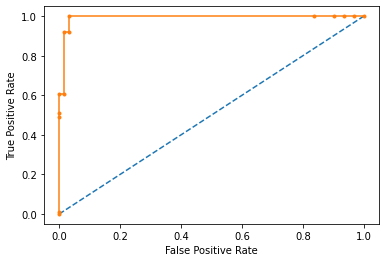

오차행렬 
 [[ 59   2]
 [  2 108]]
정확도
 0.9766081871345029
정밀도
 0.9818181818181818
재현율
 0.9818181818181818
f1_score
 0.9818181818181818
AUC
 0.9745156482861401


In [42]:
get_clt_eval(y_test, pred)
#주황색안쪽으로있는 넓이가 AUC = 0.97

In [29]:
# - 는 무슨뜻? --> 호출이 안되도록 
for a , _ in [(1,3) , (2,5)]:
    print(a)

1
2


In [43]:
#roc_curve 할때 나오는 값 알아보기 
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr , ns_tpr , _= roc_curve(y_test, ns_probs)
roc_curve(y_test, ns_probs) 

(array([0., 1.]), array([0., 1.]), array([1, 0]))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

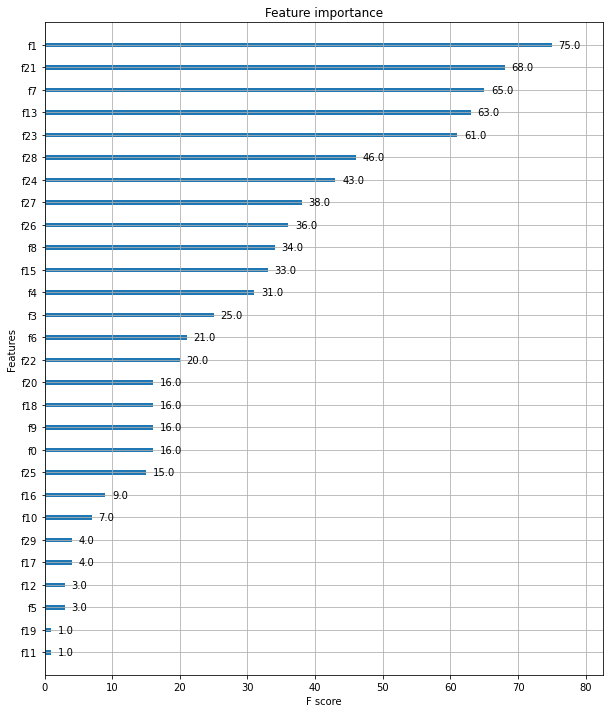

In [51]:
fig , ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_clt, ax)

In [55]:
#xgboost 의 얼리 stopping
xgb_clt = XGBClassifier(n_estimators = 400 , learning_rate = 0.1, max_depth = 3 )


xgb_clt.fit(X_train, y_train, early_stopping_rounds=100 , eval_metric='logloss', eval_set = [(X_test, y_test)], verbose=True) 
#early_stopping_rounds=100 
# estimator = 400으로 400번 진행하는데 100번 간격동안 아무 반응 없으면 (학습률/정확도의 변화가 없느면) 끝내라
#logloss로 하는데 변화 없으면 멈춰라
#verbose : 수다쟁이 - 내가 하고 있는걸 다 보여줌

pred = xgb_clt.predict(X_test)
pred_proba = xgb_clt.predict_proba(X_test) #확률로 나오는거 ROC곡선 그리기 위해 

ns_probs = [0 for _ in range(len(y_test))]
roc_curve(y_test, ns_probs) 

[0]	validation_0-logloss:0.61599
[1]	validation_0-logloss:0.55268
[2]	validation_0-logloss:0.49603
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40791
[5]	validation_0-logloss:0.37227
[6]	validation_0-logloss:0.34076
[7]	validation_0-logloss:0.31544
[8]	validation_0-logloss:0.29054
[9]	validation_0-logloss:0.26992
[10]	validation_0-logloss:0.25103
[11]	validation_0-logloss:0.23499
[12]	validation_0-logloss:0.22006
[13]	validation_0-logloss:0.20878
[14]	validation_0-logloss:0.19706
[15]	validation_0-logloss:0.18898
[16]	validation_0-logloss:0.17702
[17]	validation_0-logloss:0.16885
[18]	validation_0-logloss:0.16009
[19]	validation_0-logloss:0.15394
[20]	validation_0-logloss:0.14646
[21]	validation_0-logloss:0.13942
[22]	validation_0-logloss:0.13361
[23]	validation_0-logloss:0.12725
[24]	validation_0-logloss:0.12405
[25]	validation_0-logloss:0.11943
[26]	validation_0-logloss:0.11514
[27]	validation_0-logloss:0.11303
[28]	validation_0-logloss:0.10889
[29]	validation_0-loglos

(array([0., 1.]), array([0., 1.]), array([1, 0]))

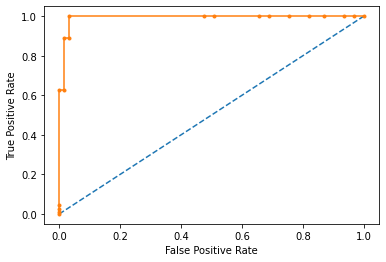

오차행렬 
 [[ 59   2]
 [  1 109]]
정확도
 0.9824561403508771
정밀도
 0.9819819819819819
재현율
 0.990909090909091
f1_score
 0.9864253393665158
AUC
 0.9790611028315946


In [53]:
get_clt_eval(y_test, pred)